<a href="https://colab.research.google.com/github/hamjaw7/hamjaw7/blob/main/Quality%20indicators_EDUCATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
#import libraries 
import pandas as pd
import seaborn as sbs
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,6) #adjusts the configuration of the plots we will create


#read in the data
data1=pd.read_excel(r"/content/sample_data/adlt edu lvl 1.xlsx")

In [95]:
data1.head(10)

,LOCATION,SUBJECT,Year,Value
0,AUS,BUPPSRY,2017,19.012659
1,AUS,BUPPSRY,2018,18.108641
2,AUS,BUPPSRY,2019,17.132658
3,AUS,BUPPSRY,2020,16.244976
4,AUS,BUPPSRY,2021,15.468880
5,AUS,TRY,2017,45.355675
6,AUS,TRY,2018,45.727478
7,AUS,TRY,2019,47.129978
8,AUS,TRY,2020,49.337452
9,AUS,TRY,2021,49.767868


In [96]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOCATION  533 non-null    object 
 1   SUBJECT   533 non-null    object 
 2   Year      533 non-null    int64  
 3   Value     533 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 16.8+ KB


In [97]:
data1.groupby(by=['SUBJECT'])
data2=data1.loc[(data1['SUBJECT'] == 'UPPSRY' ) & (data1['LOCATION'] == 'USA')]
data3=data1.loc[(data1['LOCATION'] == 'USA')]

print(data3)
print(data2)

    LOCATION  SUBJECT  Year      Value
383      USA  BUPPSRY  2017   9.354493
384      USA  BUPPSRY  2018   9.176164
385      USA  BUPPSRY  2019   9.189871
386      USA  BUPPSRY  2020   8.277081
387      USA  BUPPSRY  2021   8.293810
388      USA      TRY  2017  46.356800
389      USA      TRY  2018  47.431145
390      USA      TRY  2019  48.340187
391      USA      TRY  2020  50.055275
392      USA      TRY  2021  50.316986
393      USA   UPPSRY  2017  44.288704
394      USA   UPPSRY  2018  43.392693
395      USA   UPPSRY  2019  42.469944
396      USA   UPPSRY  2020  41.667641
397      USA   UPPSRY  2021  41.389202
    LOCATION SUBJECT  Year      Value
393      USA  UPPSRY  2017  44.288704
394      USA  UPPSRY  2018  43.392693
395      USA  UPPSRY  2019  42.469944
396      USA  UPPSRY  2020  41.667641
397      USA  UPPSRY  2021  41.389202


In [98]:
data1['SUBJECT'].value_counts(dropna =False)

TRY        180
UPPSRY     177
BUPPSRY    176
Name: SUBJECT, dtype: int64

In [99]:

data4=data3.pivot(index='Year',columns='SUBJECT',values='Value')
data4



SUBJECT,BUPPSRY,TRY,UPPSRY
Year,,,
2017,9.354493,46.356800,44.288704
2018,9.176164,47.431145,43.392693
2019,9.189871,48.340187,42.469944
2020,8.277081,50.055275,41.667641
2021,8.293810,50.316986,41.389202


In [100]:
data4.describe()

SUBJECT,BUPPSRY,TRY,UPPSRY
count,5.000000,5.000000,5.000000
mean,8.858284,48.500079,42.641637
std,0.527648,1.694227,1.206613
min,8.277081,46.356800,41.389202
25%,8.293810,47.431145,41.667641
50%,9.176164,48.340187,42.469944
75%,9.189871,50.055275,43.392693
max,9.354493,50.316986,44.288704


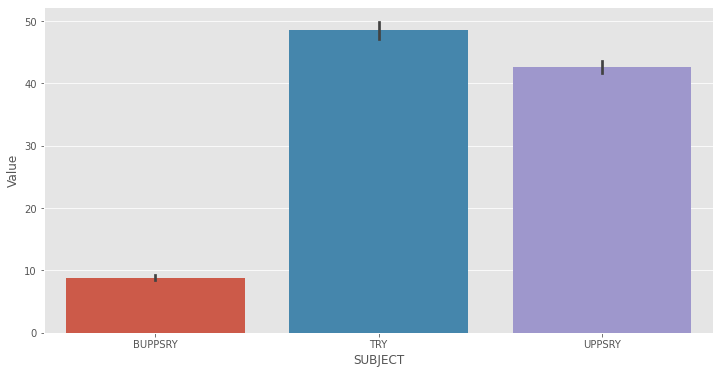

In [101]:
sbs.barplot(x="SUBJECT",y="Value",data=data3)

In [102]:
data4.corr()

SUBJECT,BUPPSRY,TRY,UPPSRY
SUBJECT,,,
BUPPSRY,1.000000,-0.946862,0.892210
TRY,-0.946862,1.000000,-0.990059
UPPSRY,0.892210,-0.990059,1.000000


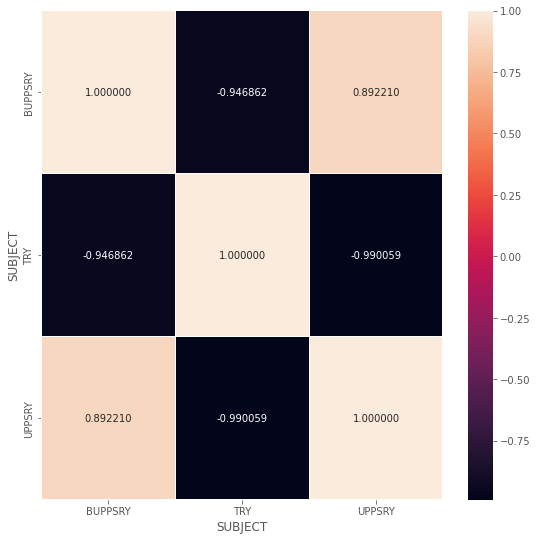

In [103]:
f,ax = plt.subplots(figsize=(9, 9))
sbs.heatmap(data4.corr(), annot=True, linewidths=.01, fmt= '.6f',ax=ax)
plt.show()

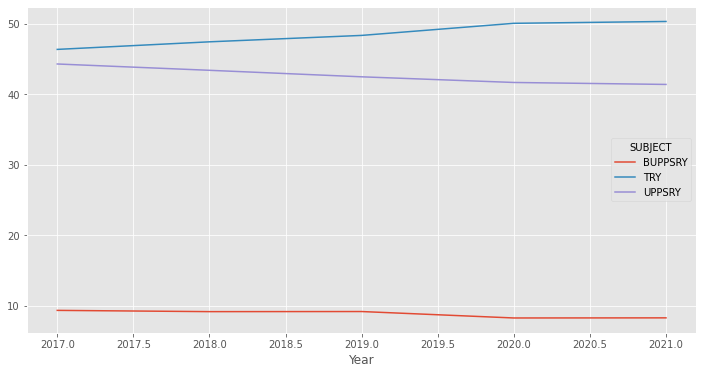

In [104]:
data5=data4
data5['Year']=[2017,2018,2019,2020,2021]
data5.plot.line(x='Year')

In [105]:
data7=data4.loc[:,'TRY']

In [106]:
data7.mean()

48.500078599999995

In [107]:
data1

,LOCATION,SUBJECT,Year,Value
0,AUS,BUPPSRY,2017,19.012659
1,AUS,BUPPSRY,2018,18.108641
2,AUS,BUPPSRY,2019,17.132658
3,AUS,BUPPSRY,2020,16.244976
4,AUS,BUPPSRY,2021,15.468880
...,...,...,...,...
528,CRI,UPPSRY,2017,16.521597
529,CRI,UPPSRY,2018,16.628136
530,CRI,UPPSRY,2019,17.629028
531,CRI,UPPSRY,2020,17.556700


In [108]:
data1.drop(data1[data1['SUBJECT'] != 'TRY'].index, inplace = True)

In [109]:
data1[data1['SUBJECT']=='TRY']

,LOCATION,SUBJECT,Year,Value
5,AUS,TRY,2017,45.355675
6,AUS,TRY,2018,45.727478
7,AUS,TRY,2019,47.129978
8,AUS,TRY,2020,49.337452
9,AUS,TRY,2021,49.767868
...,...,...,...,...
523,CRI,TRY,2017,22.989092
524,CRI,TRY,2018,22.601564
525,CRI,TRY,2019,25.066828
526,CRI,TRY,2020,25.112001


In [110]:
data1['SUBJECT'].value_counts(dropna =False)

TRY    180
Name: SUBJECT, dtype: int64

In [111]:
data1.set_index('LOCATION')

,SUBJECT,Year,Value
LOCATION,,,
AUS,TRY,2017,45.355675
AUS,TRY,2018,45.727478
AUS,TRY,2019,47.129978
AUS,TRY,2020,49.337452
AUS,TRY,2021,49.767868
...,...,...,...
CRI,TRY,2017,22.989092
CRI,TRY,2018,22.601564
CRI,TRY,2019,25.066828


In [113]:
# Calculate mean data of gender groups
data99=data1.groupby('LOCATION')['Value'].mean()
data99

LOCATION
ARG    28.535133
AUS    47.463690
AUT    33.537998
BEL    41.776208
BRA    18.649069
CAN    58.484710
CHE    44.206415
CHL    25.168179
COL    24.128618
CRI    24.081943
CZE    24.313917
DEU    29.700918
DNK    39.504294
ESP    38.518207
EST    41.093088
FIN    45.126415
FRA    37.433330
GBR    47.650246
GRC    32.391628
HUN    25.584977
IDN    11.857569
IRL    50.811928
ISL    40.229022
ISR    50.371159
ITA    21.021943
JPN    47.555479
KOR    49.840122
LTU    42.304033
LUX    46.791967
LVA    36.072888
MEX    18.709430
NLD    40.320299
NOR    44.046392
NZL    39.052691
POL    31.432242
PRT    25.868056
RUS    56.712835
SVK    25.629900
SVN    33.980580
SWE    44.082332
TUR    20.914817
USA    48.500079
ZAF    15.630376
Name: Value, dtype: float64

In [126]:
type(data99)
data9=data99.to_frame()
data9.reset_index(level=0, inplace=True)
data9

,LOCATION,Value
0,ARG,28.535133
1,AUS,47.463690
2,AUT,33.537998
3,BEL,41.776208
4,BRA,18.649069
5,CAN,58.484710
6,CHE,44.206415
7,CHL,25.168179
8,COL,24.128618
9,CRI,24.081943


In [133]:
data10=data9.sort_values(by='Value')

In [131]:
data9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOCATION  43 non-null     object 
 1   Value     43 non-null     float64
dtypes: float64(1), object(1)
memory usage: 816.0+ bytes


In [135]:
data9.describe()

,Value
count,43.000000
mean,36.025235
std,11.666374
min,11.857569
25%,25.607438
50%,38.518207
75%,44.666415
max,58.484710


Text(0.5, 1.0, 'adlt edu level')

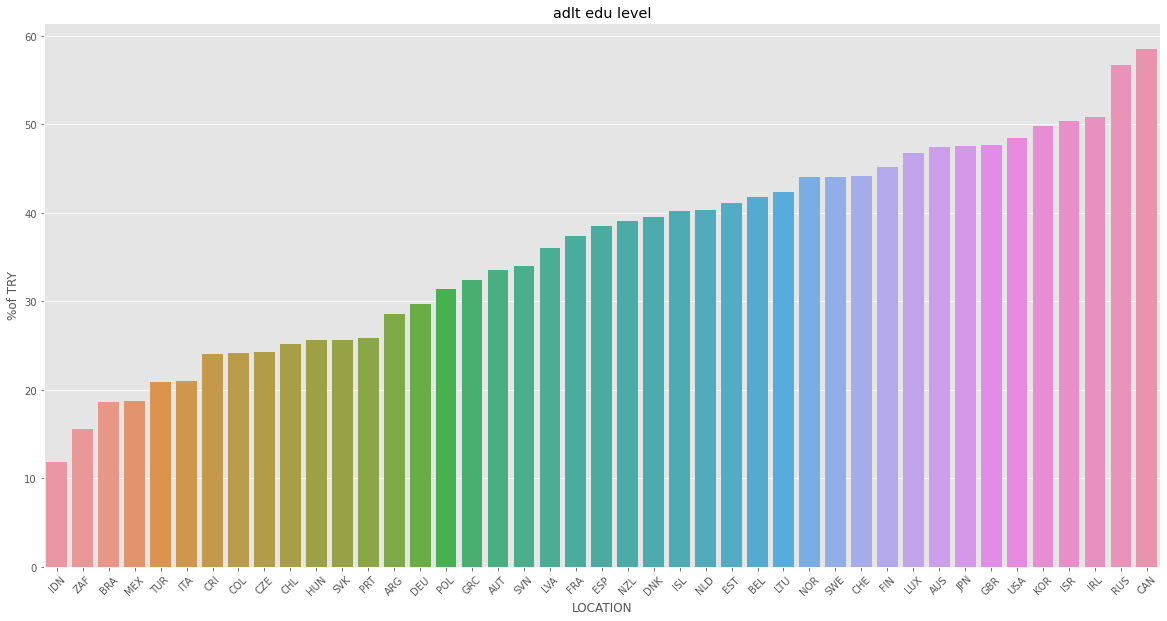

In [134]:
plt.figure(figsize=(20,10))
sbs.barplot(x="LOCATION" ,y="Value",data=data10)
plt.xticks(rotation= 45)
plt.xlabel('LOCATION')
plt.ylabel('%of TRY')
plt.title('adlt edu level')